In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Restaurant_food_cost_train.csv")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [3]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [4]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df.shape

(12690, 9)

In [6]:
#checking any null value
df.isnull().values.any()

True

In [7]:
#checking Null Value in Columns
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

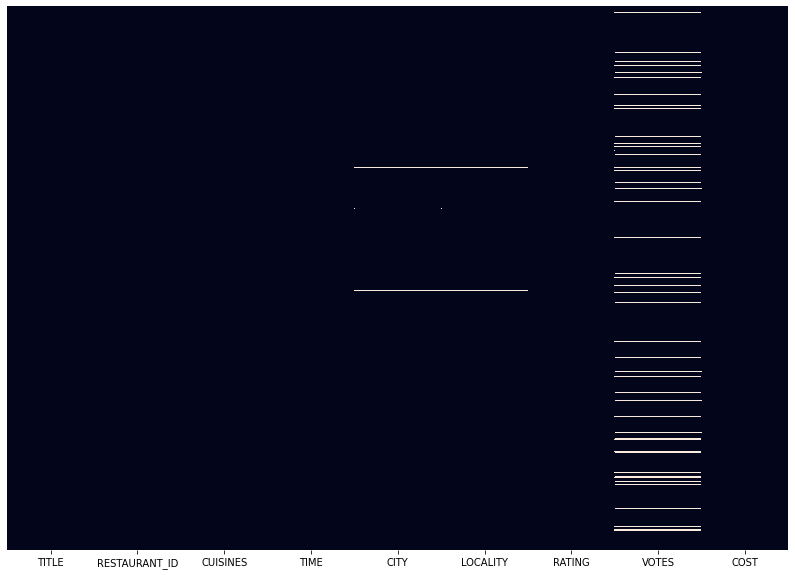

In [8]:
# null value seeing in heat map
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [10]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [11]:
df['TITLE'].unique

<bound method Series.unique of 0            CASUAL DINING
1        CASUAL DINING,BAR
2            CASUAL DINING
3              QUICK BITES
4           DESSERT PARLOR
               ...        
12685          QUICK BITES
12686    CASUAL DINING,BAR
12687               LOUNGE
12688        CASUAL DINING
12689        CASUAL DINING
Name: TITLE, Length: 12690, dtype: object>

In [12]:
df['TITLE'].str.split(',',n=1)

0             [CASUAL DINING]
1        [CASUAL DINING, BAR]
2             [CASUAL DINING]
3               [QUICK BITES]
4            [DESSERT PARLOR]
                 ...         
12685           [QUICK BITES]
12686    [CASUAL DINING, BAR]
12687                [LOUNGE]
12688         [CASUAL DINING]
12689         [CASUAL DINING]
Name: TITLE, Length: 12690, dtype: object

In [13]:
split_Title=df['TITLE'].str.split(',',n=1,expand=True)
split_Title.rename(columns={0:'TITLE1',1:'TITLE2'})
                                 

,TITLE1,TITLE2
0,CASUAL DINING,None
1,CASUAL DINING,BAR
2,CASUAL DINING,None
3,QUICK BITES,None
4,DESSERT PARLOR,None
...,...,...
12685,QUICK BITES,None
12686,CASUAL DINING,BAR
12687,LOUNGE,None
12688,CASUAL DINING,None


In [14]:
df[['TITLE1','TITLE2']]=df['TITLE'].str.split(',',n=1,expand=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None
...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,None
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,None
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,None


In [15]:
df.drop("RESTAURANT_ID",axis=1,inplace=True)

In [16]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,None
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,None
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,None


In [17]:
df['CUISINES'].str.split(',',n=4)


0                          [Malwani,  Goan,  North Indian]
1                       [Asian,  Modern Indian,  Japanese]
2          [North Indian,  Chinese,  Biryani,  Hyderabadi]
3                                      [Tibetan,  Chinese]
4                                               [Desserts]
                               ...                        
12685                      [North Indian,  Burger,  Kebab]
12686                                 [Goan,  Continental]
12687        [Finger Food,  Continental,  Asian,  Chinese]
12688    [North Indian,  South Indian,  Chinese,  Stree...
12689                             [North Indian,  Chinese]
Name: CUISINES, Length: 12690, dtype: object

In [18]:
split_Cuis=df['CUISINES'].str.split(',',n=3,expand=True)
split_Cuis.rename(columns={0:'CUISINES1',1:'CUISINES2',2:'CUISINES3',3:'CUISINES4'})

,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,Malwani,Goan,North Indian,None
1,Asian,Modern Indian,Japanese,None
2,North Indian,Chinese,Biryani,Hyderabadi
3,Tibetan,Chinese,None,None
4,Desserts,None,None,None
...,...,...,...,...
12685,North Indian,Burger,Kebab,None
12686,Goan,Continental,None,None
12687,Finger Food,Continental,Asian,Chinese
12688,North Indian,South Indian,Chinese,Street Food


In [19]:
df[['CUISINES1','CUISINES2','CUISINES3','CUISINES4']]=df['CUISINES'].str.split(',',n=3,expand=True)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,None,North Indian,Burger,Kebab,None
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR,Goan,Continental,None,None
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,None,Finger Food,Continental,Asian,Chinese
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food


In [20]:
df.drop("TITLE",axis=1,inplace=True)

In [21]:
df.drop("CUISINES",axis=1,inplace=True)

In [22]:
df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None


In [23]:
df['TIME'].str.split(',',n=5)

0                [11am – 4pm,  7:30pm – 11:30pm (Mon-Sun)]
1                                   [6pm – 11pm (Mon-Sun)]
2                   [11am – 3:30pm,  7pm – 11pm (Mon-Sun)]
3                                [11:30am – 1am (Mon-Sun)]
4                                   [11am – 1am (Mon-Sun)]
                               ...                        
12685    [12noon – 12midnight (Mon,  Tue,  Wed,  Thu,  ...
12686    [12noon – 1am (Mon-Fri), 11am – 5pm,  7pm – 1a...
12687                         [12noon – 12:30AM (Mon-Sun)]
12688                            [6am – 10:45pm (Mon-Sun)]
12689                           [12:30pm – 11pm (Mon-Sun)]
Name: TIME, Length: 12690, dtype: object

In [24]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

In [25]:
split_Time=df['TIME'].str.split(',',n=1,expand=True)
split_Time.rename(columns={0:'TIME1',1:'TIME2'})

,TIME1,TIME2
0,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,6pm – 11pm (Mon-Sun),None
2,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,11:30am – 1am (Mon-Sun),None
4,11am – 1am (Mon-Sun),None
...,...,...
12685,12noon – 12midnight (Mon,"Tue, Wed, Thu, Sun)..."
12686,12noon – 1am (Mon-Fri),"11am – 5pm, 7pm – 1am..."
12687,12noon – 12:30AM (Mon-Sun),None
12688,6am – 10:45pm (Mon-Sun),None


In [26]:
df[['TIME1','TIME2']]=df['TIME'].str.split(',',n=1,expand=True)
df

,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,6pm – 11pm (Mon-Sun),None
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None,11:30am – 1am (Mon-Sun),None
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None,11am – 1am (Mon-Sun),None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,None,North Indian,Burger,Kebab,None,12noon – 12midnight (Mon,"Tue, Wed, Thu, Sun)..."
12686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR,Goan,Continental,None,None,12noon – 1am (Mon-Fri),"11am – 5pm, 7pm – 1am..."
12687,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,None,Finger Food,Continental,Asian,Chinese,12noon – 12:30AM (Mon-Sun),None
12688,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food,6am – 10:45pm (Mon-Sun),None


In [27]:
df.drop("TIME",axis=1,inplace=True)

In [28]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,6pm – 11pm (Mon-Sun),None
2,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None,11:30am – 1am (Mon-Sun),None
4,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None,11am – 1am (Mon-Sun),None


In [29]:
df.isnull().sum()

CITY           112
LOCALITY        98
RATING           2
VOTES         1204
COST             0
TITLE1           0
TITLE2       11208
CUISINES1        0
CUISINES2     3062
CUISINES3     6999
CUISINES4     9995
TIME1            0
TIME2         9438
dtype: int64

In [30]:
df['CITY']=df['CITY'].astype(str)

In [31]:
df['CITY']=df['CITY'].replace(0,np.NaN)

In [32]:
df['CITY']=df['CITY'].fillna(df['CITY'].mode())

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
df['CITY']=le.fit_transform(df['CITY'])




In [35]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,Dombivali East,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,67,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,6pm – 11pm (Mon-Sun),None
2,67,Saligramam,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,222,Bandra West,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None,11:30am – 1am (Mon-Sun),None
4,222,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None,11am – 1am (Mon-Sun),None


In [36]:
df['LOCALITY']=df['LOCALITY'].astype(str)

In [37]:
df['LOCALITY']=df['LOCALITY'].replace(0,np.NaN)

In [38]:
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mode())

In [39]:
le=LabelEncoder()
df['LOCALITY']=le.fit_transform(df['LOCALITY'])

In [40]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,6pm – 11pm (Mon-Sun),None
2,67,1101,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None,11:30am – 1am (Mon-Sun),None
4,222,620,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None,11am – 1am (Mon-Sun),None


In [41]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [42]:
df['RATING']=df['RATING'].replace(['NEW'],np.nan)

In [43]:
df['RATING']=df['RATING'].replace(['-'],np.nan)

In [44]:
df['RATING']=df['RATING'].astype(float)

In [45]:
df['RATING']=df['RATING'].fillna(df['RATING'].mean())

In [46]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,CASUAL DINING,None,Malwani,Goan,North Indian,None,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,6pm – 11pm (Mon-Sun),None
2,67,1101,3.8,221 votes,800,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,QUICK BITES,None,Tibetan,Chinese,None,None,11:30am – 1am (Mon-Sun),None
4,222,620,3.8,165 votes,300,DESSERT PARLOR,None,Desserts,None,None,None,11am – 1am (Mon-Sun),None


In [47]:
le=LabelEncoder()
df['TITLE1']=le.fit_transform(df['TITLE1'])

In [48]:
le=LabelEncoder()
df['CUISINES1']=le.fit_transform(df['CUISINES1'])

In [49]:
le=LabelEncoder()
df['TIME1']=le.fit_transform(df['TIME1'])

In [50]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,None,59,Goan,North Indian,None,343,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,4,BAR,6,Modern Indian,Japanese,None,945,None
2,67,1101,3.8,221 votes,800,4,None,72,Chinese,Biryani,Hyderabadi,327,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,21,None,100,Chinese,None,None,178,None
4,222,620,3.8,165 votes,300,8,None,28,None,None,None,316,None


In [51]:
df['CUISINES2']=df['CUISINES2'].replace({None : np.NaN})

In [52]:
df['CUISINES3']=df['CUISINES3'].replace({None : np.NaN})

In [53]:
df['CUISINES4']=df['CUISINES4'].replace({None : np.NaN})

In [54]:
df['TIME2']=df['TIME2'].replace({None : np.NaN})

In [55]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,None,59,Goan,North Indian,NaN,343,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,4,BAR,6,Modern Indian,Japanese,NaN,945,NaN
2,67,1101,3.8,221 votes,800,4,None,72,Chinese,Biryani,Hyderabadi,327,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,21,None,100,Chinese,NaN,NaN,178,NaN
4,222,620,3.8,165 votes,300,8,None,28,NaN,NaN,NaN,316,NaN


In [56]:
df['TITLE2']=df['TITLE2'].fillna(df['TITLE2'].mode())

In [57]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,BAR,59,Goan,North Indian,NaN,343,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,4,BAR,6,Modern Indian,Japanese,NaN,945,NaN
2,67,1101,3.8,221 votes,800,4,NaN,72,Chinese,Biryani,Hyderabadi,327,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,21,NaN,100,Chinese,NaN,NaN,178,NaN
4,222,620,3.8,165 votes,300,8,NaN,28,NaN,NaN,NaN,316,NaN


In [58]:
df['CUISINES2']=df['CUISINES2'].fillna(df['CUISINES2'].mode())

In [59]:
df['CUISINES3']=df['CUISINES3'].fillna(df['CUISINES3'].mode())


In [60]:
df['CUISINES4']=df['CUISINES4'].fillna(df['CUISINES4'].mode())

In [61]:
df['TIME2']=df['TIME2'].fillna(df['TIME2'].mode())

In [62]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,BAR,59,Goan,North Indian,Chinese,343,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,4,BAR,6,Modern Indian,Japanese,NaN,945,NaN
2,67,1101,3.8,221 votes,800,4,NaN,72,Chinese,Biryani,Hyderabadi,327,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,21,NaN,100,Chinese,NaN,NaN,178,NaN
4,222,620,3.8,165 votes,300,8,NaN,28,NaN,NaN,NaN,316,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CITY       12690 non-null  int32  
 1   LOCALITY   12690 non-null  int32  
 2   RATING     12690 non-null  float64
 3   VOTES      11486 non-null  object 
 4   COST       12690 non-null  int64  
 5   TITLE1     12690 non-null  int32  
 6   TITLE2     1483 non-null   object 
 7   CUISINES1  12690 non-null  int32  
 8   CUISINES2  9628 non-null   object 
 9   CUISINES3  5691 non-null   object 
 10  CUISINES4  2696 non-null   object 
 11  TIME1      12690 non-null  int32  
 12  TIME2      3252 non-null   object 
dtypes: float64(1), int32(5), int64(1), object(6)
memory usage: 1.0+ MB


In [64]:
df['TITLE2']=df['TITLE2'].astype(str)

In [65]:
le=LabelEncoder()
df['TITLE2']=le.fit_transform(df['TITLE2'])

In [66]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,1,59,Goan,North Indian,Chinese,343,7:30pm – 11:30pm (Mon-Sun)
1,67,1046,4.2,30 votes,1500,4,1,6,Modern Indian,Japanese,NaN,945,NaN
2,67,1101,3.8,221 votes,800,4,19,72,Chinese,Biryani,Hyderabadi,327,7pm – 11pm (Mon-Sun)
3,222,136,4.1,24 votes,800,21,19,100,Chinese,NaN,NaN,178,NaN
4,222,620,3.8,165 votes,300,8,19,28,NaN,NaN,NaN,316,NaN


In [67]:
df['CUISINES2']=df['CUISINES2'].astype(str)

In [68]:
le=LabelEncoder()
df['CUISINES2']=le.fit_transform(df['CUISINES2'])

In [69]:
df['CUISINES3']=df['CUISINES3'].astype(str)

In [70]:
le=LabelEncoder()
df['CUISINES3']=le.fit_transform(df['CUISINES3'])

In [71]:
df['CUISINES4']=df['CUISINES4'].astype(str)

In [72]:
le=LabelEncoder()
df['CUISINES4']=le.fit_transform(df['CUISINES4'])

In [73]:
df['TIME2']=df['TIME2'].astype(str)

In [74]:
le=LabelEncoder()
df['TIME2']=le.fit_transform(df['TIME2'])

In [75]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49 votes,1200,4,1,59,32,66,161,343,302
1,67,1046,4.2,30 votes,1500,4,1,6,60,41,835,945,1167
2,67,1101,3.8,221 votes,800,4,19,72,23,12,362,327,388
3,222,136,4.1,24 votes,800,21,19,100,23,93,835,178,1167
4,222,620,3.8,165 votes,300,8,19,28,98,93,835,316,1167


In [76]:
df1=df.replace(['votes'],[''],regex=True)

In [77]:
df1

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49,1200,4,1,59,32,66,161,343,302
1,67,1046,4.2,30,1500,4,1,6,60,41,835,945,1167
2,67,1101,3.8,221,800,4,19,72,23,12,362,327,388
3,222,136,4.1,24,800,21,19,100,23,93,835,178,1167
4,222,620,3.8,165,300,8,19,28,98,93,835,316,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,131,342,3.8,546,500,21,19,72,17,44,835,521,571
12686,222,133,4.3,1214,1800,4,1,37,25,93,835,536,766
12687,239,1342,4.0,608,1300,14,19,34,25,4,161,519,1167
12688,67,631,3.5,32,400,4,19,72,84,21,783,904,1167


In [78]:
df1['VOTES'].unique()

array(['49 ', '30 ', '221 ', ..., '2723 ', '1426 ', '1214 '], dtype=object)

In [79]:
df1['VOTES']=df1['VOTES'].astype(float)

In [80]:
df1['VOTES']=df1['VOTES'].fillna(df1['VOTES'].mean())

In [81]:
df1.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,320,285,3.6,49.0,1200,4,1,59,32,66,161,343,302
1,67,1046,4.2,30.0,1500,4,1,6,60,41,835,945,1167
2,67,1101,3.8,221.0,800,4,19,72,23,12,362,327,388
3,222,136,4.1,24.0,800,21,19,100,23,93,835,178,1167
4,222,620,3.8,165.0,300,8,19,28,98,93,835,316,1167


In [82]:
#checking any null value
df1.isnull().values.any()

False

Now there are no any null value 

# Summary Statistics

In [83]:
df1.describe()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,144.814894,660.609220,3.785452,415.668901,655.252246,11.563357,17.571946,49.272577,55.765879,68.950985,741.803861,588.831521,995.813869
std,85.919816,403.571164,0.401565,801.745630,627.003540,8.227629,4.506218,28.482250,32.494159,31.541815,211.590793,394.075802,329.616134
min,0.000000,0.000000,2.000000,4.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,337.000000,3.600000,64.000000,300.000000,4.000000,19.000000,25.000000,23.000000,37.000000,835.000000,290.000000,1164.000000
50%,131.000000,590.000000,3.800000,200.000000,500.000000,9.000000,19.000000,48.000000,61.000000,93.000000,835.000000,514.000000,1167.000000
75%,222.000000,1011.000000,4.000000,415.668901,800.000000,21.000000,19.000000,72.000000,93.000000,93.000000,835.000000,913.000000,1167.000000
max,359.000000,1416.000000,4.900000,41186.000000,14000.000000,22.000000,19.000000,103.000000,98.000000,93.000000,835.000000,1394.000000,1167.000000


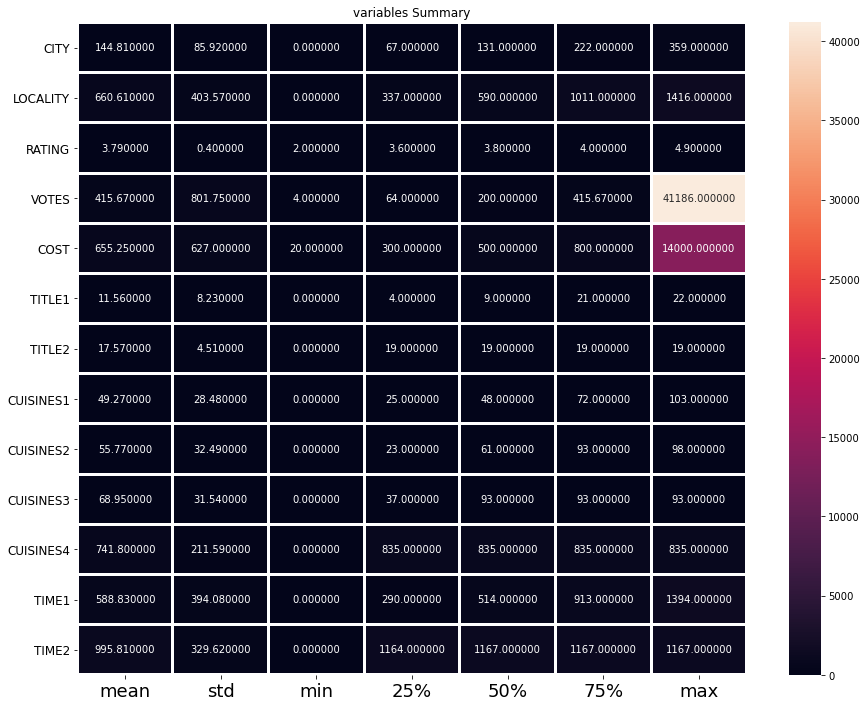

In [84]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2), linewidth=2, annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables Summary")
plt.show()

# To check the Correlation

In [85]:
df1.corr()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
CITY,1.000000,0.069816,0.060781,0.047966,0.038946,-0.006807,-0.014998,0.010917,0.006032,-0.002655,-0.001123,-0.008501,0.069623
LOCALITY,0.069816,1.000000,-0.019868,-0.030914,-0.018318,0.039433,0.016350,0.018118,0.020816,0.013790,0.012944,-0.005760,0.002866
RATING,0.060781,-0.019868,1.000000,0.347949,0.320065,-0.164776,-0.188319,-0.078140,-0.059395,-0.093682,-0.131673,0.034147,-0.122113
VOTES,0.047966,-0.030914,0.347949,1.000000,0.240241,-0.136425,-0.165355,-0.041267,-0.076294,-0.135618,-0.126874,-0.019899,-0.073733
COST,0.038946,-0.018318,0.320065,0.240241,1.000000,-0.299395,-0.265428,-0.038959,-0.078140,-0.172255,-0.168822,-0.012331,-0.158518
TITLE1,-0.006807,0.039433,-0.164776,-0.136425,-0.299395,1.000000,0.195740,0.209399,0.142549,0.179738,0.150276,0.055159,0.064768
TITLE2,-0.014998,0.016350,-0.188319,-0.165355,-0.265428,0.195740,1.000000,0.111588,0.144860,0.142448,0.145065,0.024505,-0.025975
CUISINES1,0.010917,0.018118,-0.078140,-0.041267,-0.038959,0.209399,0.111588,1.000000,0.038182,-0.018597,0.034819,0.098981,-0.045351
CUISINES2,0.006032,0.020816,-0.059395,-0.076294,-0.078140,0.142549,0.144860,0.038182,1.000000,0.264758,0.153671,0.092210,-0.014328
CUISINES3,-0.002655,0.013790,-0.093682,-0.135618,-0.172255,0.179738,0.142448,-0.018597,0.264758,1.000000,0.380492,0.031673,0.015840


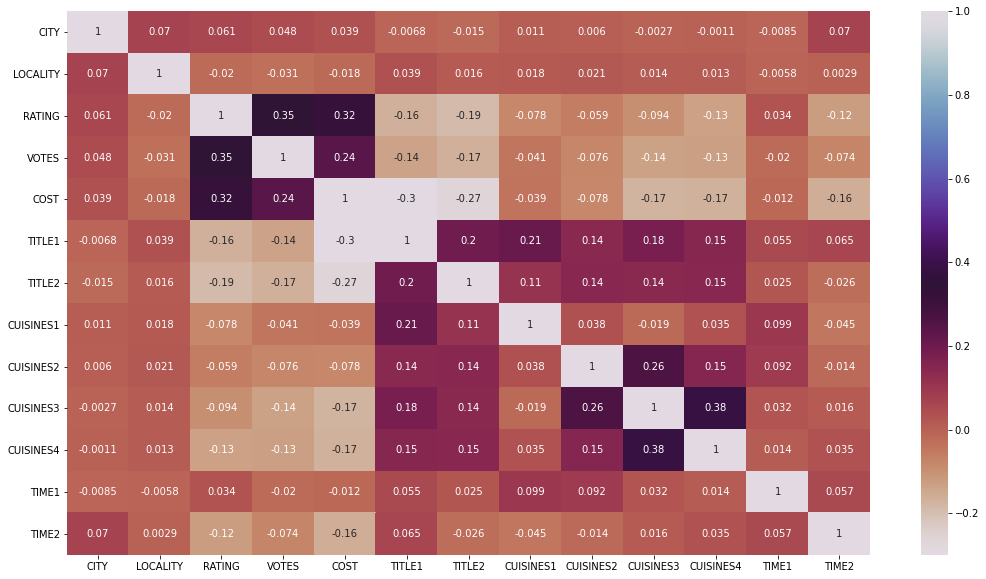

In [86]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True,cmap='twilight_r')

Text(0.5, 1.0, 'Correlation with Target Variable')

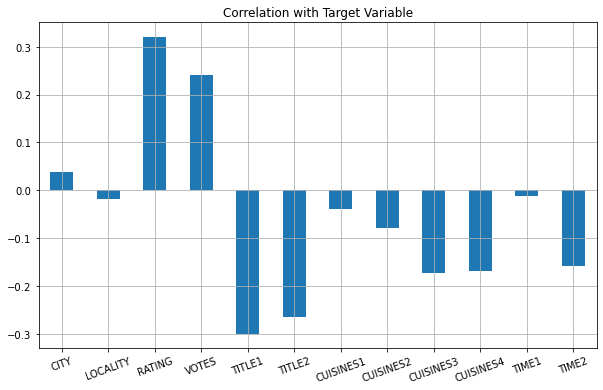

In [87]:
#checking the correlation with target Variable
plt.figure(figsize=(10,6))
df1.drop('COST',axis=1).corrwith(df1['COST']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with Target Variable")

only Rating , Votes and City Columns are Positive Correlation and Rest all are Negative Correlated Columns .

# Data Visulization

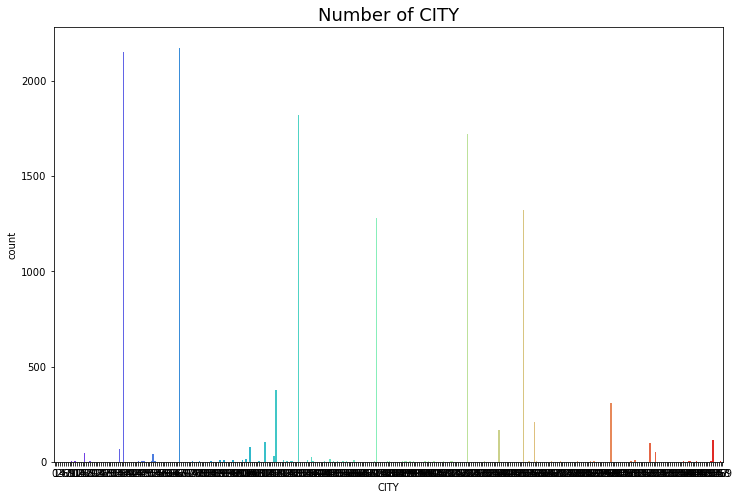

67     2174
37     2149
131    1819
222    1722
252    1321
       ... 
5         1
13        1
21        1
29        1
0         1
Name: CITY, Length: 360, dtype: int64


In [88]:
plt.subplots(figsize=(12,8))
sns.countplot(x='CITY',data=df1,palette='rainbow')
plt.title('Number of CITY',fontsize=18)
plt.show()

print(df['CITY'].value_counts())

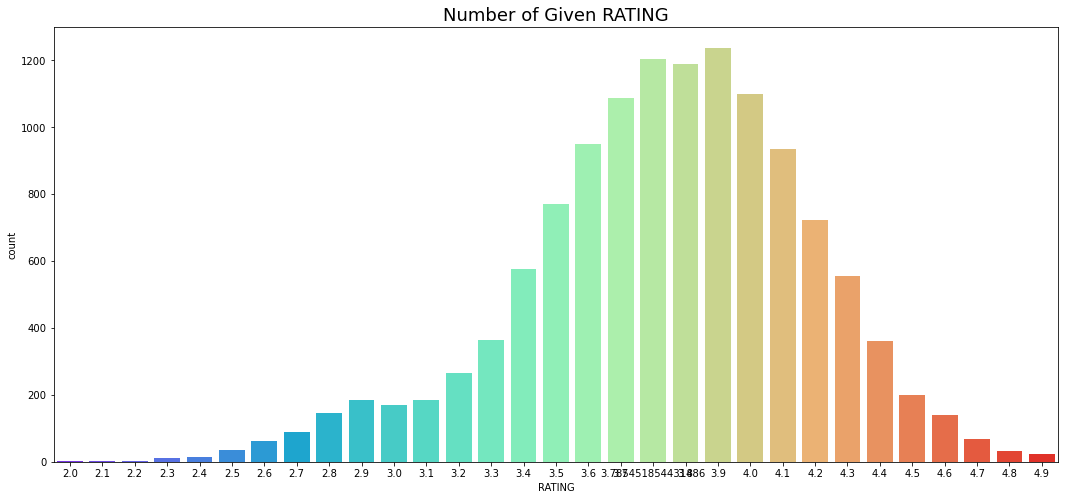

3.900000    1238
3.785452    1204
3.800000    1190
4.000000    1099
3.700000    1086
3.600000     951
4.100000     936
3.500000     771
4.200000     723
3.400000     575
4.300000     556
3.300000     365
4.400000     362
3.200000     266
4.500000     199
2.900000     186
3.100000     186
3.000000     170
2.800000     146
4.600000     141
2.700000      89
4.700000      69
2.600000      61
2.500000      35
4.800000      32
4.900000      22
2.400000      15
2.300000      10
2.100000       3
2.200000       2
2.000000       2
Name: RATING, dtype: int64


In [89]:
plt.subplots(figsize=(18,8))
sns.countplot(x='RATING',data=df1,palette='rainbow')
plt.title('Number of Given RATING',fontsize=18)
plt.show()

print(df['RATING'].value_counts())

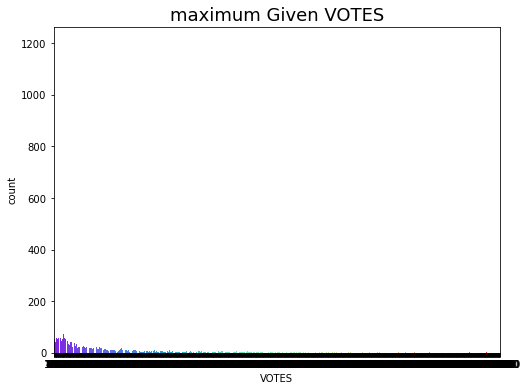

44 votes      71
28 votes      66
29 votes      66
38 votes      65
35 votes      64
              ..
799 votes      1
2956 votes     1
2059 votes     1
1237 votes     1
1398 votes     1
Name: VOTES, Length: 1847, dtype: int64


In [90]:
plt.subplots(figsize=(8,6))
sns.countplot(x='VOTES',data=df1,palette='rainbow')
plt.title('maximum Given VOTES',fontsize=18)
plt.show()

print(df['VOTES'].value_counts())

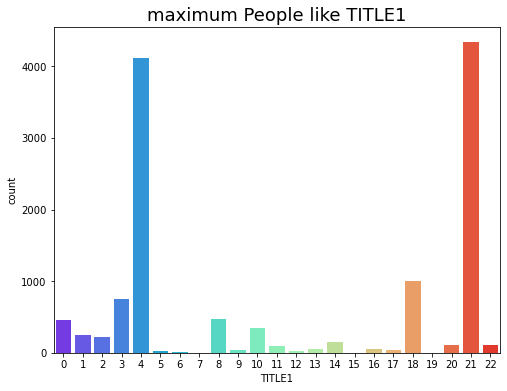

21    4337
4     4122
18    1003
3      749
8      478
0      463
10     350
1      254
2      215
14     154
20     103
22     102
11      93
13      56
16      53
9       45
17      44
12      30
5       23
6        6
19       4
7        3
15       3
Name: TITLE1, dtype: int64


In [91]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE1',data=df1,palette='rainbow')
plt.title('maximum People like TITLE1',fontsize=18)
plt.show()

print(df['TITLE1'].value_counts())

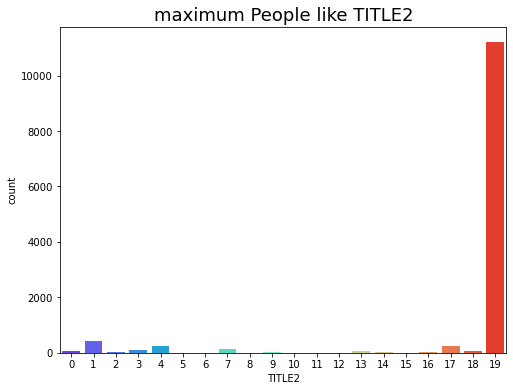

19    11207
1       429
17      261
4       257
7       138
3        94
0        69
18       53
13       47
16       35
2        34
14       27
9        15
8         8
5         5
12        4
11        3
6         2
10        1
15        1
Name: TITLE2, dtype: int64


In [92]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE2',data=df1,palette='rainbow')
plt.title('maximum People like TITLE2',fontsize=18)
plt.show()

print(df['TITLE2'].value_counts())

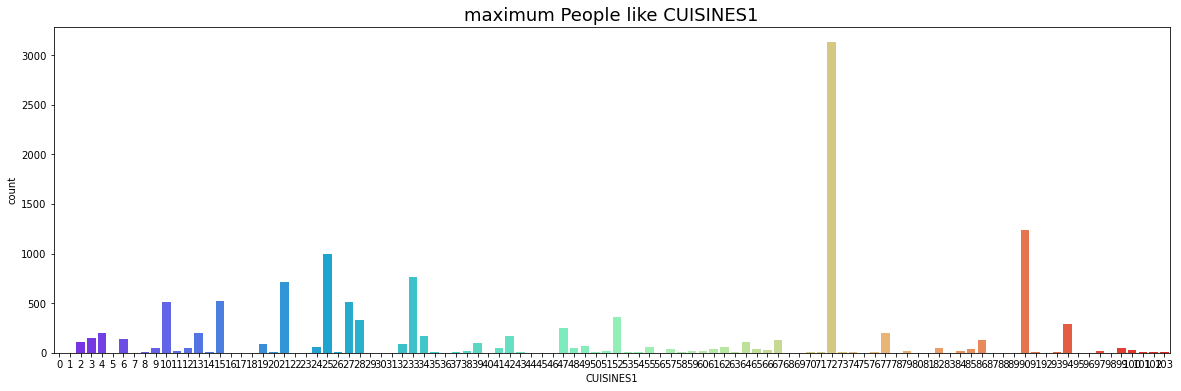

72    3129
90    1241
25     996
33     762
21     713
      ... 
5        1
68       1
44       1
83       1
0        1
Name: CUISINES1, Length: 104, dtype: int64


In [93]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES1',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES1',fontsize=18)
plt.show()

print(df['CUISINES1'].value_counts())

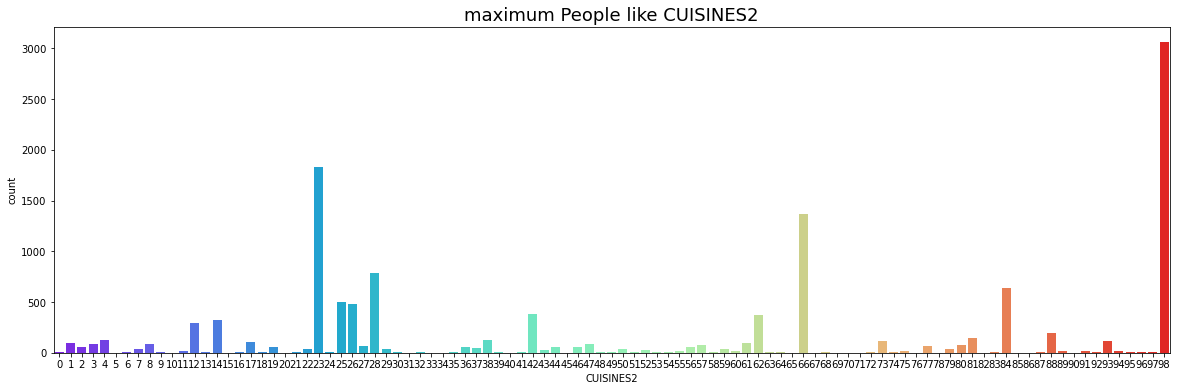

98    3062
23    1830
66    1373
28     782
84     638
      ... 
5        1
76       1
67       1
33       1
10       1
Name: CUISINES2, Length: 99, dtype: int64


In [94]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES2',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES2',fontsize=18)
plt.show()

print(df['CUISINES2'].value_counts())

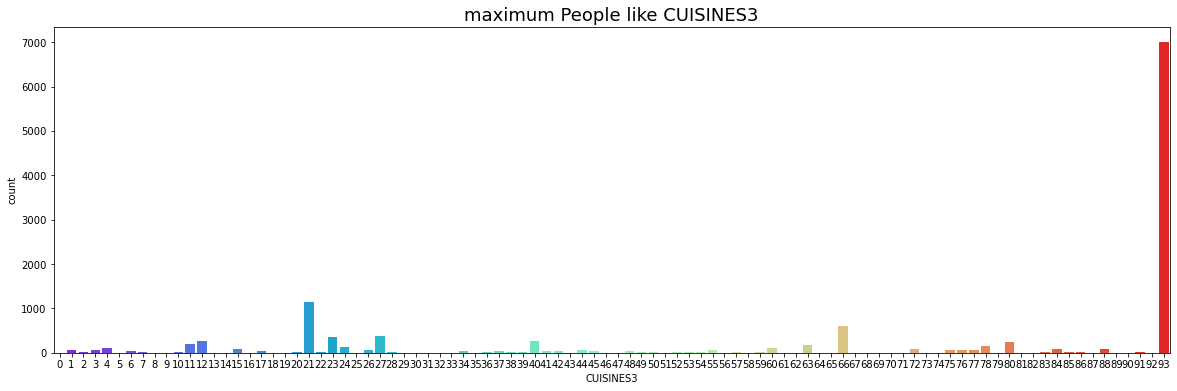

93    6999
21    1146
66     593
27     387
23     345
      ... 
61       1
30       1
9        1
14       1
64       1
Name: CUISINES3, Length: 94, dtype: int64


In [95]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES3',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES3',fontsize=18)
plt.show()

print(df['CUISINES3'].value_counts())

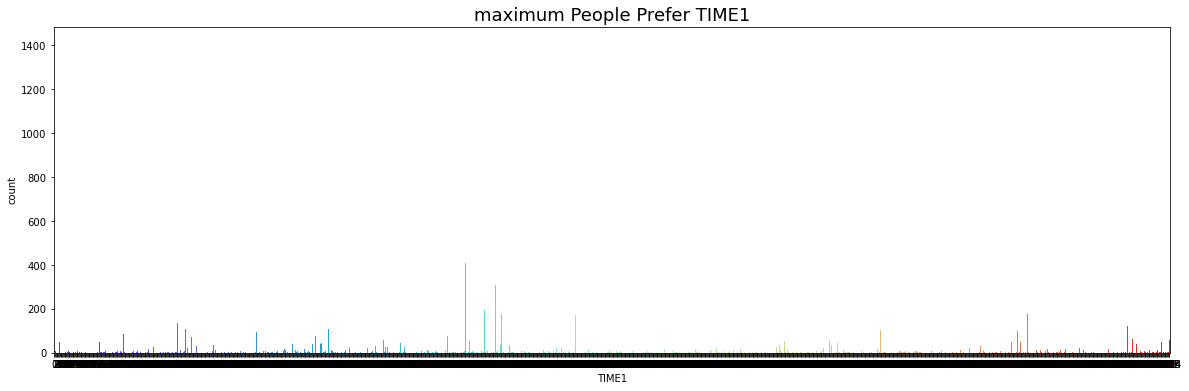

290    1415
525     469
514     407
305     310
552     308
       ... 
60        1
52        1
44        1
28        1
0         1
Name: TIME1, Length: 1395, dtype: int64


In [96]:
plt.subplots(figsize=(20,6))
sns.countplot(x='TIME1',data=df1,palette='rainbow')
plt.title('maximum People Prefer TIME1',fontsize=18)
plt.show()

print(df['TIME1'].value_counts())

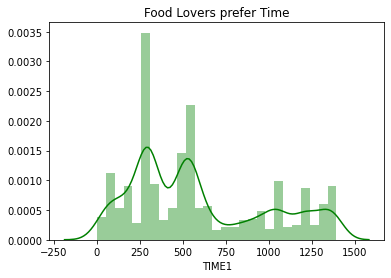

In [97]:
sns.distplot(df1['TIME1'], color='g')
plt.title("Food Lovers prefer Time")
plt.show()

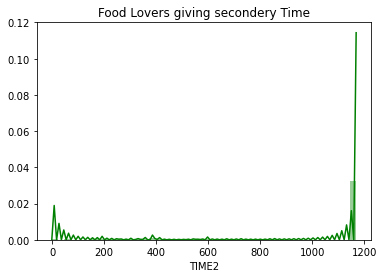

In [98]:
sns.distplot(df1['TIME2'], color='g')
plt.title("Food Lovers giving secondery Time")
plt.show()

In [99]:
df1.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE1', 'TITLE2',
       'CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'TIME1', 'TIME2'],
      dtype='object')

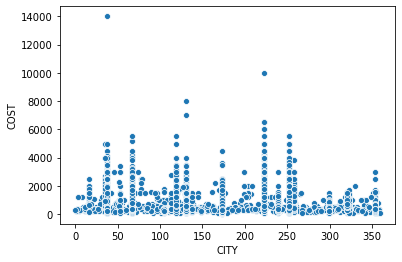

In [100]:
sns.scatterplot(x="CITY" ,y="COST",data=df1)

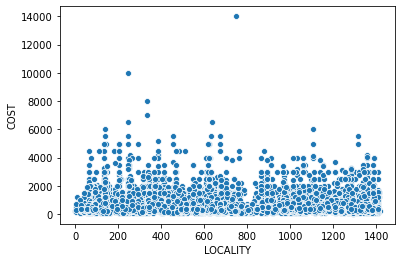

In [101]:
sns.scatterplot(x="LOCALITY" ,y="COST",data=df1)

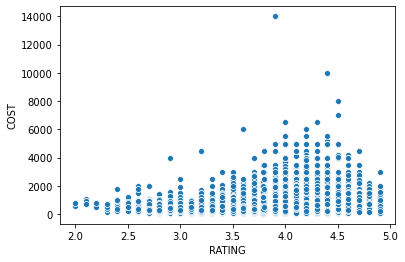

In [102]:
sns.scatterplot(x="RATING" ,y="COST",data=df1)

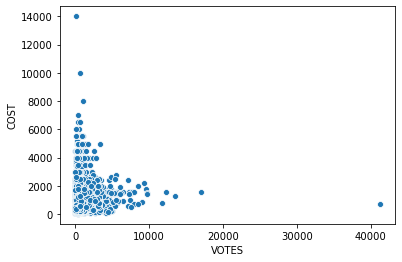

In [103]:
sns.scatterplot(x="VOTES" ,y="COST",data=df1)

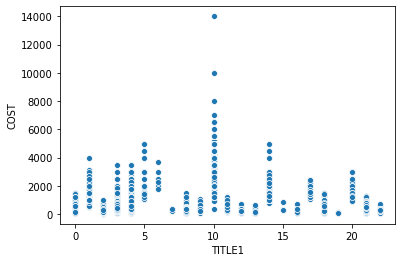

In [104]:
sns.scatterplot(x="TITLE1" ,y="COST",data=df1)

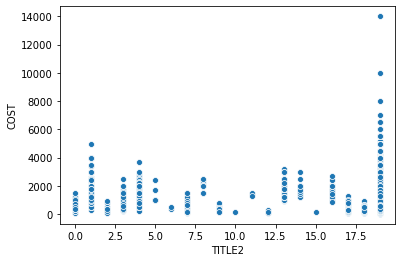

In [105]:
sns.scatterplot(x="TITLE2" ,y="COST",data=df1)

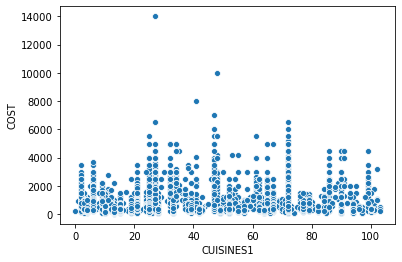

In [106]:
sns.scatterplot(x="CUISINES1" ,y="COST",data=df1)

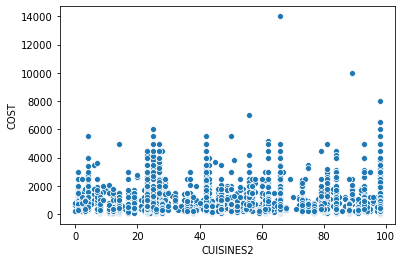

In [107]:
sns.scatterplot(x="CUISINES2" ,y="COST",data=df1)

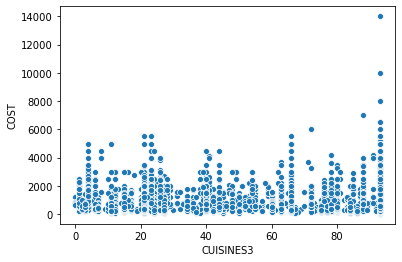

In [108]:
sns.scatterplot(x="CUISINES3" ,y="COST",data=df1)

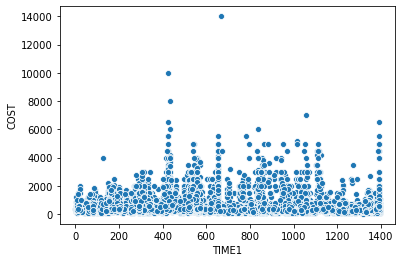

In [109]:
sns.scatterplot(x="TIME1" ,y="COST",data=df1)

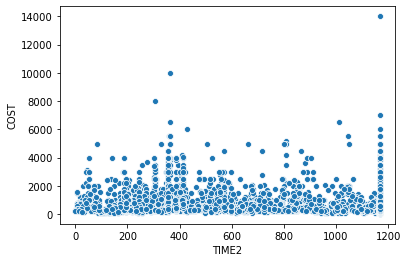

In [110]:
sns.scatterplot(x="TIME2" ,y="COST",data=df1)

# Checking the Outliers and Skewness

In [111]:
df1.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE1', 'TITLE2',
       'CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'TIME1', 'TIME2'],
      dtype='object')

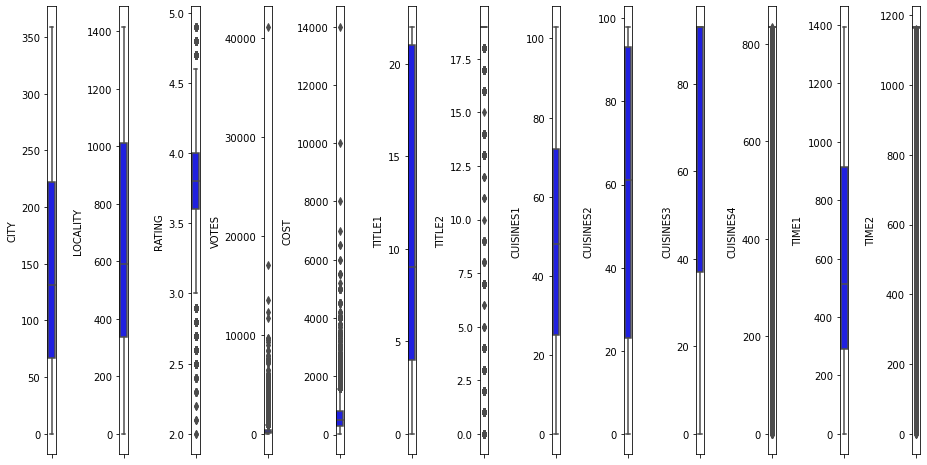

In [112]:
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

Columns VOTES , RATING, COST , TITLE2 , COUSIN4, TIME2 outliers are Present and rest Columns have no outliers .

In [113]:
df1.skew()

CITY          0.297804
LOCALITY      0.333505
RATING       -0.537352
VOTES        14.890494
COST          3.978801
TITLE1        0.087325
TITLE2       -3.063441
CUISINES1     0.026008
CUISINES2     0.055174
CUISINES3    -0.823537
CUISINES4    -2.192777
TIME1         0.635672
TIME2        -1.628610
dtype: float64

VOTES and COST shows Positive  Skewness and TITLE2 , COUSIN4 and TIME2 shows Negavive Skewness Present

# Removeing Outliers and Skewness

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))
z

(array([    0,     1,     5, ..., 12669, 12674, 12686], dtype=int64), array([ 6,  6, 10, ..., 10,  6,  6], dtype=int64))


array([[2.0390175 , 0.9307504 , 0.46184081, ..., 2.74504736, 0.62384243,
        2.10499771],
       [0.90570445, 0.95498886, 1.03237172, ..., 0.44047196, 0.90384264,
        0.51937044],
       [0.90570445, 1.09127751, 0.03623004, ..., 1.79506311, 0.66444536,
        1.84407787],
       ...,
       [1.09624091, 1.68846957, 0.53430088, ..., 2.74504736, 0.17721025,
        0.51937044],
       [0.90570445, 0.07337092, 0.71087623, ..., 0.19470489, 0.79979764,
        0.51937044],
       [0.16079455, 1.66616779, 0.95991165, ..., 0.44047196, 0.44874232,
        0.51937044]])

In [115]:
df_new=df1[(z<3).all(axis=1)]

In [116]:
df_new

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
2,67,1101,3.8,221.0,800,4,19,72,23,12,362,327,388
3,222,136,4.1,24.0,800,21,19,100,23,93,835,178,1167
4,222,620,3.8,165.0,300,8,19,28,98,93,835,316,1167
6,37,575,4.1,509.0,600,3,19,21,23,72,591,496,498
7,119,1153,4.3,1612.0,1600,17,19,11,98,93,835,634,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,252,723,3.8,492.0,550,4,19,72,23,93,835,290,1167
12685,131,342,3.8,546.0,500,21,19,72,17,44,835,521,571
12687,239,1342,4.0,608.0,1300,14,19,34,25,4,161,519,1167
12688,67,631,3.5,32.0,400,4,19,72,84,21,783,904,1167


In [117]:
df1.shape

(12690, 13)

In [118]:
#Percentage loss of Data after removing outliers
percentage_loss=((12690-11018)/12690)*100
print(percentage_loss)

13.175728920409771


# Model Traning

In [119]:
x=df_new.drop(columns=['COST'],axis=1)

In [120]:
x.head()

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
2,67,1101,3.8,221.0,4,19,72,23,12,362,327,388
3,222,136,4.1,24.0,21,19,100,23,93,835,178,1167
4,222,620,3.8,165.0,8,19,28,98,93,835,316,1167
6,37,575,4.1,509.0,3,19,21,23,72,591,496,498
7,119,1153,4.3,1612.0,17,19,11,98,93,835,634,1167


In [121]:
y=df_new['COST']

In [122]:
y.head()

2     800
3     800
4     300
6     600
7    1600
Name: COST, dtype: int64

In [123]:
#remove Skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')


In [124]:
df_new.skew()

CITY         0.322741
LOCALITY     0.324181
RATING      -0.452169
VOTES        2.659760
COST         2.130401
TITLE1      -0.035363
TITLE2      -6.950543
CUISINES1   -0.008878
CUISINES2   -0.013329
CUISINES3   -0.997538
CUISINES4   -2.752554
TIME1        0.607430
TIME2       -1.684489
dtype: float64

In [125]:
# Scaling in input Variables

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [126]:
# Splitting the data into tranning and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [127]:
#checking the shape
print(x_train.shape, '\t\t',x_test.shape)

(8814, 12) 		 (2204, 12)


In [128]:
print(y_train.shape,'\t', y_test.shape)

(8814,) 	 (2204,)


In [129]:
# importing all models Liberary
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# importing all Boosting Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing Cross val Score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [130]:
lr=LinearRegression()
print('lr')
parameters ={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

ls=Lasso()
parameters ={'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(1,10))}
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ls')
print('*************************************')
print('\n')

rd=Ridge()
print('rd')
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[1e-3], 'random_state':list(range(0,10))}
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

en=ElasticNet()
print('en')
parameters ={'alpha':[.0001, .001, .01,.1 ,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'l1_ratio' :[0.5]}
clf=GridSearchCV(en,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

dt=DecisionTreeRegressor()
print('dt')
parameters ={'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
print('sv')
parameters= {'kernel':['linear','poly','rbf','sigmoid']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv=SVR()
parameters= {'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn=KNeighborsRegressor()
print('knn')
parameters= {'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')


lr
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
*************************************


{'alpha': 1, 'random_state': 1}
ls
*************************************


rd
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}
*************************************


en
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'normalize': False}
*************************************


dt
{'criterion': 'mse', 'splitter': 'best'}
*************************************


sv
{'kernel': 'linear'}
*************************************


{'gamma': 'scale'}
*************************************


knn
{'algorithm': 'brute', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
*************************************




In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [132]:
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='friedman_mse', splitter='best'),KNeighborsRegressor(algorithm='brute', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='linear', gamma='scale')]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of LinearRegression(normalize=True) is: 0.2455245931678257
Error
Mean Absolute Error: 233.3733818487071
Mean Square Error: 122833.74988180236
root mean squared Error: 350.47646123784455
r2_score: 0.2688959688231217
*********************************************************************************************


Score of Lasso(alpha=1, random_state=1) is: 0.24546342956440514
Error
Mean Absolute Error: 233.40803202145833
Mean Square Error: 122921.6439219074
root mean squared Error: 350.60183103045455
r2_score: 0.26837282524817563
*********************************************************************************************


Score of Ridge(alpha=0.1, normalize=True, random_state=0) is: 0.24451007947098669
Error
Mean Absolute Error: 233.2462396027482
Mean Square Error: 123317.97876703358
root mean squared Error: 351.16659688392
r2_score: 0.2660138481490767
*********************************************************************************************


Score of ElasticNet(alpha=0.01) is:

In [133]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None, normalize=True),Lasso(alpha=1,random_state=1),Ridge(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001),ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,normalize=False),DecisionTreeRegressor(criterion='friedman_mse', splitter='best'),KNeighborsRegressor(algorithm='brute', leaf_size=30, metric_params=None, n_jobs=1),SVR(kernel='linear', gamma='scale')]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: LinearRegression(normalize=True) is:
score: [0.25941921 0.23805984 0.24909232]
mean score: 0.24885712257935422
Standard Deviation: 0.008721514602043484
***************************************************************************************


Score of: Lasso(alpha=1, random_state=1) is:
score: [0.25910204 0.23842518 0.24894776]
mean score: 0.2488249899084837
Standard Deviation: 0.008441739833180592
***************************************************************************************


Score of: Ridge(alpha=0.1, normalize=True, random_state=0) is:
score: [0.25917891 0.23761579 0.24738816]
mean score: 0.24806095241809725
Standard Deviation: 0.008815949489878674
***************************************************************************************


Score of: ElasticNet(alpha=0.01) is:
score: [0.2594635  0.23809238 0.24904982]
mean score: 0.24886856817703204
Standard Deviation: 0.008725664754176321
*******************************************************************************

# Ensemble Technique

In [134]:
adb=AdaBoostRegressor()
parameters={'base_estimator':[None],'n_estimators':[10,20,30,40,50],'loss':['linear', 'square', 'exponential']}
clf=GridSearchCV(adb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('adb')
print('*************************************')
print('\n')

{'base_estimator': None, 'loss': 'linear', 'n_estimators': 20}
adb
*************************************




In [135]:
gdb=GradientBoostingRegressor()
parameters = {'loss': ['ls','lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('gdb')
print('*************************************')
print('\n')

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}
gdb
*************************************




In [137]:
from sklearn.tree import ExtraTreeRegressor
ext=ExtraTreeRegressor()
parameters ={'criterion':['friedman_mse','mae','mse'], 'splitter':['random', 'best']}
clf=GridSearchCV(ext,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ext')
print('*************************************')
print('\n')

{'criterion': 'friedman_mse', 'splitter': 'best'}
ext
*************************************




In [138]:
model=[ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best'),AdaBoostRegressor(base_estimator= None, loss= 'linear', n_estimators=20),GradientBoostingRegressor(criterion = 'mse', loss= 'ls', n_estimators= 200)]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Square Error:',mean_squared_error(y_test,predm))
    print("root mean squared Error:", np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of ExtraTreeRegressor(criterion='friedman_mse', splitter='best') is: 0.9999625688050139
Error
Mean Absolute Error: 214.10753176043556
Mean Square Error: 108993.52041742287
root mean squared Error: 330.14166719368046
r2_score: 0.35127273875449316
*********************************************************************************************


Score of AdaBoostRegressor(n_estimators=20) is: 0.33260623642057163
Error
Mean Absolute Error: 246.4657219774339
Mean Square Error: 112590.58542509045
root mean squared Error: 335.54520623172436
r2_score: 0.3298630795196198
*********************************************************************************************


Score of GradientBoostingRegressor(criterion='mse', n_estimators=200) is: 0.7219853989323666
Error
Mean Absolute Error: 159.09358022837935
Mean Square Error: 55251.519022496555
root mean squared Error: 235.0564166801165
r2_score: 0.6711440599602048
***********************************************************************************

In [139]:
from sklearn.model_selection import cross_val_score
model=[ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best'),AdaBoostRegressor(base_estimator= None, loss= 'linear', n_estimators=20),GradientBoostingRegressor(criterion = 'mse', loss= 'ls', n_estimators= 200)]
for m in model:
    score=cross_val_score(m,x,y,cv=3,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: ExtraTreeRegressor(criterion='friedman_mse', splitter='best') is:
score: [0.27982997 0.28624287 0.30260566]
mean score: 0.2895594990386629
Standard Deviation: 0.00958933645089662
***************************************************************************************


Score of: AdaBoostRegressor(n_estimators=20) is:
score: [0.28292888 0.22263399 0.22412044]
mean score: 0.24322776966119375
Standard Deviation: 0.02807948426990024
***************************************************************************************


Score of: GradientBoostingRegressor(criterion='mse', n_estimators=200) is:
score: [0.65591276 0.64686088 0.68122165]
mean score: 0.6613317629124942
Standard Deviation: 0.014541657356062969
***************************************************************************************




# The Best Model is ExtraTreeRegressor because of the score = 0.9999 is Maximum

In [141]:
ext=ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best')
ext.fit(x_train,y_train)
print('score:',ext.score(x_train,y_train))
predext=ext.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predext))
print('Mean Squared Error:',mean_squared_error(y_test,predext))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predext)))
print('\n')
print("r2_score",r2_score(y_test,predext))

score: 0.9999625688050139


Mean absolute Error: 214.73366606170597
Mean Squared Error: 110099.50952813067
Root Mean Squared Error: 331.8124613816224


r2_score 0.3446899136103102


# Conclusion

In [142]:
import numpy as np
a=np.array(y_test)
a

array([100, 700, 400, ..., 800, 750, 500], dtype=int64)

In [143]:
predicted=np.array(ext.predict(x_test))
predicted

array([ 150.,  700.,  500., ..., 1000.,  700.,  650.])

In [144]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [145]:
df_com

,original,predicted
0,100,150.0
1,700,700.0
2,400,500.0
3,750,600.0
4,200,300.0
...,...,...
2199,600,600.0
2200,450,550.0
2201,800,1000.0
2202,750,700.0


In [146]:
#Saving the Model
import pickle
filename= 'Project_14_Restaurent_FoodCost.pkl'
pickle.dump(ext,open(filename,'wb'))

# Using the Test Dataset

In [148]:
test_df=pd.read_csv("Restaurant_food_cost_test.csv")
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [149]:
test_df.shape

(4231, 8)

In [150]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [154]:
test_df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [163]:
test_df.isnull().values.any()

True

In [164]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

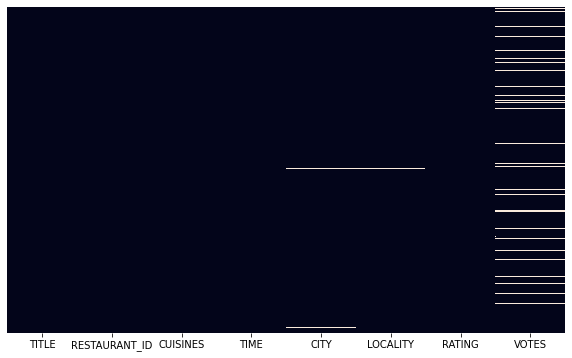

In [166]:
# null value seeing in heat map
plt.figure(figsize=(10,6))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [169]:
test_df['TITLE'].str.split(',',n=1)

0       [CASUAL DINING]
1         [QUICK BITES]
2       [CASUAL DINING]
3                [None]
4         [QUICK BITES]
             ...       
4226    [CASUAL DINING]
4227             [None]
4228      [QUICK BITES]
4229      [QUICK BITES]
4230      [QUICK BITES]
Name: TITLE, Length: 4231, dtype: object

In [170]:
split_Title=test_df['TITLE'].str.split(',',n=1,expand=True)
split_Title.rename(columns={0:'TITLE1',1:'TITLE2'})

,TITLE1,TITLE2
0,CASUAL DINING,None
1,QUICK BITES,None
2,CASUAL DINING,None
3,None,None
4,QUICK BITES,None
...,...,...
4226,CASUAL DINING,None
4227,None,None
4228,QUICK BITES,None
4229,QUICK BITES,None


In [171]:
test_df[['TITLE1','TITLE2']]=test_df['TITLE'].str.split(',',n=1,expand=True)
test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,None
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,None
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,None
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,CASUAL DINING,None
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,None,None
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,QUICK BITES,None
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,QUICK BITES,None


In [174]:
test_df.drop('TITLE',axis=1,inplace=True)

In [175]:
test_df.drop("RESTAURANT_ID",axis=1,inplace=True)

In [176]:
test_df.head()

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2
0,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,None
1,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None
2,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None
3,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,None
4,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,None


In [179]:
split_Cuis=test_df['CUISINES'].str.split(',',n=3,expand=True)
split_Cuis.rename(columns={0:'CUISINES1',1:'CUISINES2',2:'CUISINES3',3:'CUISINES4'})

,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,North Indian,Chinese,Mughlai,Kebab
1,South Indian,Fast Food,Pizza,North Indian
2,North Indian,Seafood,Biryani,Chinese
3,Biryani,None,None,None
4,South Indian,Kerala,None,None
...,...,...,...,...
4226,North Indian,Mughlai,Chinese,None
4227,Biryani,North Indian,Sandwich,"Salad, Wraps"
4228,Continental,North Indian,None,None
4229,Rolls,Beverages,None,None


In [183]:
test_df[['CUISINES1','CUISINES2','CUISINES3','CUISINES4']]=test_df['CUISINES'].str.split(',',n=3,expand=True)
test_df.head()

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,None,North Indian,Chinese,Mughlai,Kebab
1,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None,South Indian,Fast Food,Pizza,North Indian
2,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None,North Indian,Seafood,Biryani,Chinese
3,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,None,Biryani,None,None,None
4,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,None,South Indian,Kerala,None,None


In [184]:
test_df.drop('CUISINES',axis=1,inplace=True)

In [185]:
test_df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,None,North Indian,Chinese,Mughlai,Kebab
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None,South Indian,Fast Food,Pizza,North Indian
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None,North Indian,Seafood,Biryani,Chinese
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,None,Biryani,None,None,None
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,None,South Indian,Kerala,None,None


In [187]:
split_Time=test_df['TIME'].str.split(',',n=1,expand=True)
split_Time.rename(columns={0:'TIME1',1:'TIME2'})

,TIME1,TIME2
0,12noon – 12midnight (Mon-Sun),None
1,7am – 12:30AM (Mon-Sun),None
2,11am – 11:30pm (Mon-Sun),None
3,9am – 10pm (Mon,"Wed, Thu, Fri, Sat, Sun), 10:39am..."
4,11am – 10pm (Mon-Sun),None
...,...,...
4226,11:30am – 11:30pm (Mon-Sun),None
4227,11am – 1am (Mon-Sun),None
4228,9:30am – 10:30pm (Mon-Sun),None
4229,11am – 11:30pm (Mon,"Tue, Wed, Thu, Sat, Sun), 3pm..."


In [188]:
test_df[['TIME1','TIME2']]=test_df['TIME'].str.split(',',n=1,expand=True)
test_df.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,None,North Indian,Chinese,Mughlai,Kebab,12noon – 12midnight (Mon-Sun),None
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None,South Indian,Fast Food,Pizza,North Indian,7am – 12:30AM (Mon-Sun),None
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None,North Indian,Seafood,Biryani,Chinese,11am – 11:30pm (Mon-Sun),None
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,None,None,Biryani,None,None,None,9am – 10pm (Mon,"Wed, Thu, Fri, Sat, Sun), 10:39am..."
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,None,South Indian,Kerala,None,None,11am – 10pm (Mon-Sun),None


In [189]:
test_df.drop('TIME',axis=1,inplace=True)

In [190]:
test_df.head()

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,Noida,Sector 18,4.3,564 votes,CASUAL DINING,None,North Indian,Chinese,Mughlai,Kebab,12noon – 12midnight (Mon-Sun),None
1,Mumbai,Grant Road,4.2,61 votes,QUICK BITES,None,South Indian,Fast Food,Pizza,North Indian,7am – 12:30AM (Mon-Sun),None
2,Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,None,North Indian,Seafood,Biryani,Chinese,11am – 11:30pm (Mon-Sun),None
3,Faridabad,NIT,3.8,1445 votes,None,None,Biryani,None,None,None,9am – 10pm (Mon,"Wed, Thu, Fri, Sat, Sun), 10:39am..."
4,Kochi,Kaloor,3.6,23 votes,QUICK BITES,None,South Indian,Kerala,None,None,11am – 10pm (Mon-Sun),None


In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
le=LabelEncoder()
test_df['TITLE1']=le.fit_transform(test_df['TITLE1'])

In [195]:
test_df['TITLE2']=test_df['TITLE2'].astype(str)

In [196]:
le=LabelEncoder()
test_df['TITLE2']=le.fit_transform(test_df['TITLE2'])

In [197]:
le=LabelEncoder()
test_df['CUISINES1']=le.fit_transform(test_df['CUISINES1'])

In [199]:
test_df['CUISINES2']=test_df['CUISINES2'].astype(str)

In [200]:
le=LabelEncoder()
test_df['CUISINES2']=le.fit_transform(test_df['CUISINES2'])

In [201]:
test_df['CUISINES3']=test_df['CUISINES3'].astype(str)

In [203]:
le=LabelEncoder()
test_df['CUISINES3']=le.fit_transform(test_df['CUISINES3'])

In [204]:
test_df['CUISINES4']=test_df['CUISINES4'].astype(str)

In [205]:
le=LabelEncoder()
test_df['CUISINES4']=le.fit_transform(test_df['CUISINES4'])

In [206]:
le=LabelEncoder()
test_df['TIME1']=le.fit_transform(test_df['TIME1'])

In [207]:
test_df['TIME2']=test_df['TIME2'].astype(str)

In [208]:
le=LabelEncoder()
test_df['TIME2']=le.fit_transform(test_df['TIME2'])

In [209]:
test_df.head()

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,Noida,Sector 18,4.3,564 votes,5,13,60,19,56,209,299,510
1,Mumbai,Grant Road,4.2,61 votes,22,13,73,24,61,251,592,510
2,Mumbai,Marine Lines,3.8,350 votes,5,13,60,69,13,79,147,510
3,Faridabad,NIT,3.8,1445 votes,19,13,12,81,80,363,719,264
4,Kochi,Kaloor,3.6,23 votes,22,13,73,42,80,363,140,510


In [211]:
test_df['CITY']=test_df['CITY'].astype(str)

In [212]:
le=LabelEncoder()
test_df['CITY']=le.fit_transform(test_df['CITY'])

In [214]:
test_df['LOCALITY']=test_df['LOCALITY'].astype(str)

In [215]:
le=LabelEncoder()
test_df['LOCALITY']=le.fit_transform(test_df['LOCALITY'])

In [216]:
test_df.head()

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,110,662,4.3,564 votes,5,13,60,19,56,209,299,510
1,96,221,4.2,61 votes,22,13,73,24,61,251,592,510
2,96,411,3.8,350 votes,5,13,60,69,13,79,147,510
3,41,456,3.8,1445 votes,19,13,12,81,80,363,719,264
4,78,300,3.6,23 votes,22,13,73,42,80,363,140,510


In [217]:
test_df['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', nan], dtype=object)

In [218]:
test_df['RATING']=test_df['RATING'].replace(['NEW'],np.nan)

In [219]:
test_df['RATING']=test_df['RATING'].replace(['-'],np.nan)

In [220]:
test_df['RATING']=test_df['RATING'].replace(['-'],np.nan)

In [222]:
test_df['RATING']=test_df['RATING'].astype(float)

In [224]:
test_df['RATING']=test_df['RATING'].fillna(test_df['RATING'].mean())

In [256]:
test_df

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,110,662,4.300000,564 votes,5,13,60,19,56,209,299,510
1,96,221,4.200000,61 votes,22,13,73,24,61,251,592,510
2,96,411,3.800000,350 votes,5,13,60,69,13,79,147,510
3,41,456,3.800000,1445 votes,19,13,12,81,80,363,719,264
4,78,300,3.600000,23 votes,22,13,73,42,80,363,140,510
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,108,597,3.900000,287 votes,5,13,60,57,19,363,86,510
4227,9,237,4.300000,469 votes,19,13,12,59,65,298,172,510
4228,41,696,3.700000,53 votes,22,13,22,59,80,363,700,510
4229,78,332,3.781536,NaN,22,13,67,10,80,363,144,241


In [262]:
test_df['VOTES']=test_df['VOTES'].fillna(test_df['VOTES'].mode())

In [264]:
test_df['VOTES']=test_df['VOTES'].astype(str)

In [265]:
le=LabelEncoder()
test_df['VOTES']=le.fit_transform(test_df['VOTES'])

In [267]:
test_df

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,110,662,4.300000,823,5,13,60,19,56,209,299,510
1,96,221,4.200000,871,22,13,73,24,61,251,592,510
2,96,411,3.800000,575,5,13,60,69,13,79,147,510
3,41,456,3.800000,179,19,13,12,81,80,363,719,264
4,78,300,3.600000,394,22,13,73,42,80,363,140,510
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,108,597,3.900000,487,5,13,60,57,19,363,86,510
4227,9,237,4.300000,722,19,13,12,59,65,298,172,510
4228,41,696,3.700000,789,22,13,22,59,80,363,700,510
4229,78,332,3.781536,1136,22,13,67,10,80,363,144,241


In [268]:
test_df.isnull().values.any()

False

# Checking the Outliers and Skewness

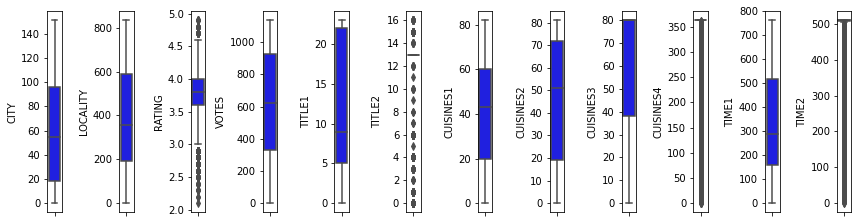

In [271]:
collist=test_df.columns.values
ncol=20
nrows=20
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(test_df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

Figure shows that rating  , Title2, Cuisines4 and Time2 columns are  outliers present . 

In [272]:
test_df.skew()

CITY         0.115001
LOCALITY     0.302174
RATING      -0.598758
VOTES       -0.061888
TITLE1       0.078593
TITLE2      -3.239490
CUISINES1   -0.047693
CUISINES2    0.019973
CUISINES3   -0.872745
CUISINES4   -2.186667
TIME1        0.566311
TIME2       -1.693058
dtype: float64

Figure shows that......
Columns Title2 = -3.239490 , Cuisines3 = -0.872745 , Cuisines4 = -2.186667 and Time2 = -1.693058 are showing Negative Skewness

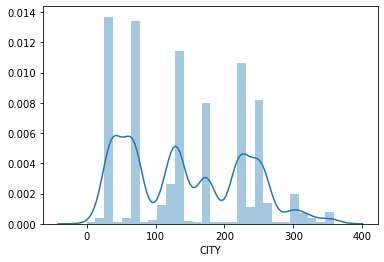

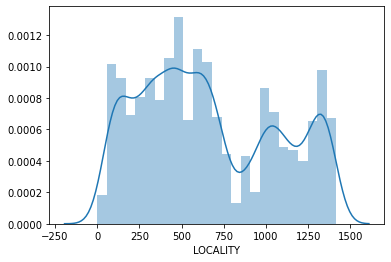

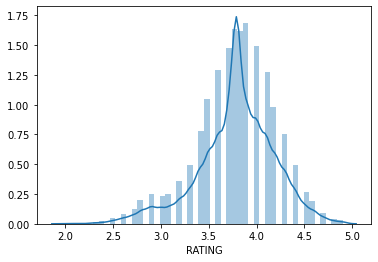

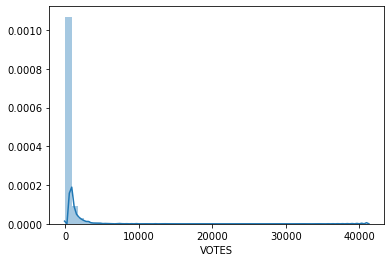

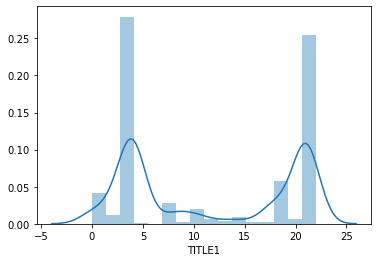

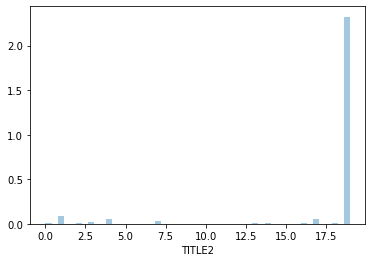

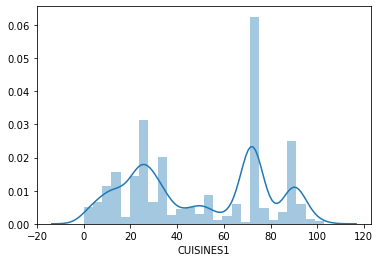

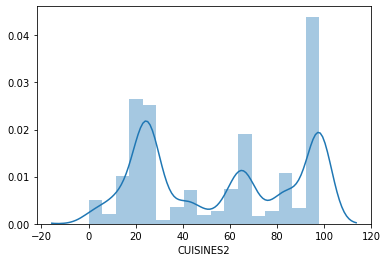

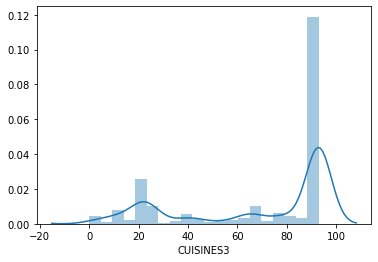

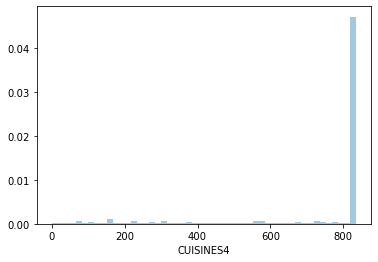

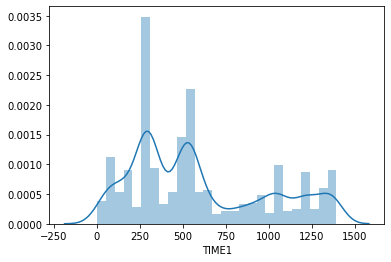

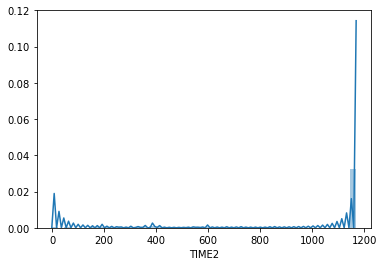

In [273]:
for i in test_df.columns:
    sns.distplot(test_df1[i])
    plt.show()

In [274]:
# Remove Outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(test_df))
threshold=3
print(np.where(z>3))

(array([  12,   39,   40,   48,   54,   67,   68,   78,   85,   96,   98,
        121,  127,  152,  164,  165,  166,  173,  198,  231,  240,  249,
        256,  261,  261,  276,  281,  314,  319,  322,  345,  348,  350,
        353,  366,  368,  388,  393,  394,  404,  407,  414,  426,  437,
        444,  457,  459,  475,  490,  503,  505,  507,  516,  531,  531,
        534,  538,  549,  552,  553,  553,  565,  565,  573,  592,  630,
        644,  656,  669,  683,  688,  716,  727,  743,  744,  777,  812,
        812,  826,  861,  875,  887,  888,  904,  924,  931,  932,  945,
        961,  985,  996,  998, 1000, 1004, 1005, 1006, 1022, 1035, 1038,
       1039, 1045, 1060, 1088, 1089, 1091, 1098, 1115, 1129, 1130, 1134,
       1137, 1163, 1173, 1177, 1196, 1199, 1200, 1221, 1236, 1267, 1267,
       1281, 1286, 1301, 1308, 1323, 1363, 1367, 1393, 1418, 1428, 1449,
       1449, 1465, 1467, 1476, 1483, 1502, 1506, 1537, 1543, 1549, 1550,
       1557, 1560, 1566, 1572, 1578, 1579, 1594, 1

In [275]:
test_dfnew=test_df[(z<3).all(axis=1)]

In [276]:
test_dfnew

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,TIME1,TIME2
0,110,662,4.300000,823,5,13,60,19,56,209,299,510
1,96,221,4.200000,871,22,13,73,24,61,251,592,510
2,96,411,3.800000,575,5,13,60,69,13,79,147,510
3,41,456,3.800000,179,19,13,12,81,80,363,719,264
4,78,300,3.600000,394,22,13,73,42,80,363,140,510
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,108,597,3.900000,487,5,13,60,57,19,363,86,510
4227,9,237,4.300000,722,19,13,12,59,65,298,172,510
4228,41,696,3.700000,789,22,13,22,59,80,363,700,510
4229,78,332,3.781536,1136,22,13,67,10,80,363,144,241


In [277]:
test_df.shape

(4231, 12)

In [278]:
#Percentage loss of Data after removing outliers
percentage_loss=((4231-3845)/4231)*100
print(percentage_loss)

9.123138737887023


In [279]:
# Load the Model
import pickle
fitted_model=pickle.load(open("Project_14_Restaurent_FoodCost.pkl","rb"))

In [280]:
fitted_model

ExtraTreeRegressor(criterion='friedman_mse', splitter='best')

In [281]:
#prediction over test data

predictions = fitted_model.predict(test_df)

In [282]:
predictions

array([450., 450., 450., ..., 450., 450., 450.])